In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = df_["Potability_det"]
x = df_.drop(["Potability_det"], axis=1)

mean = x.mean(axis=0)
x = x-mean

scaler_s = StandardScaler()
scaler_m = MinMaxScaler()

x_normalized = pd.DataFrame(scaler_m.fit_transform(x), columns=x.columns)
x_standardized = pd.DataFrame(scaler_s.fit_transform(x), columns=x.columns)

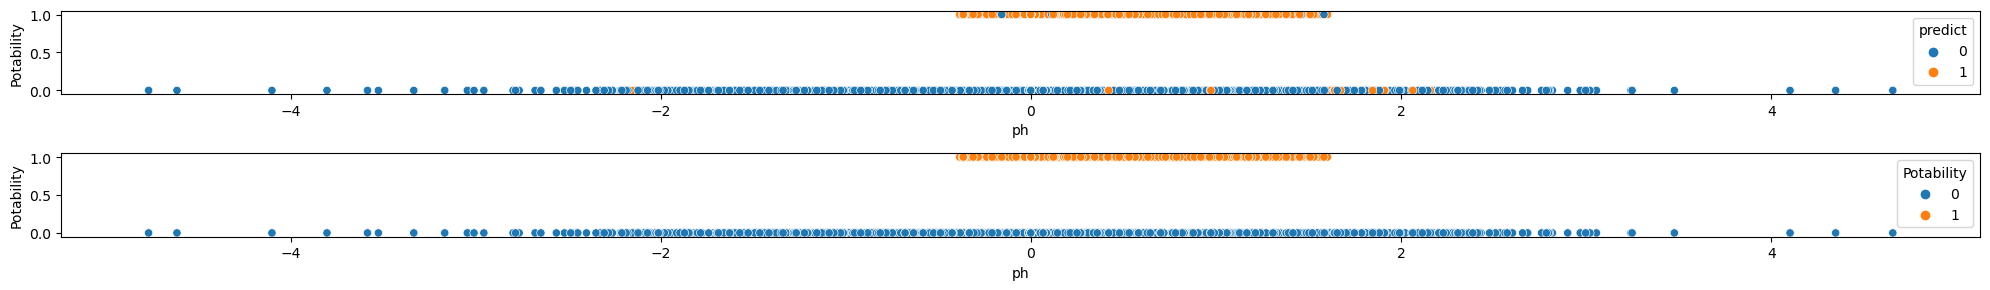

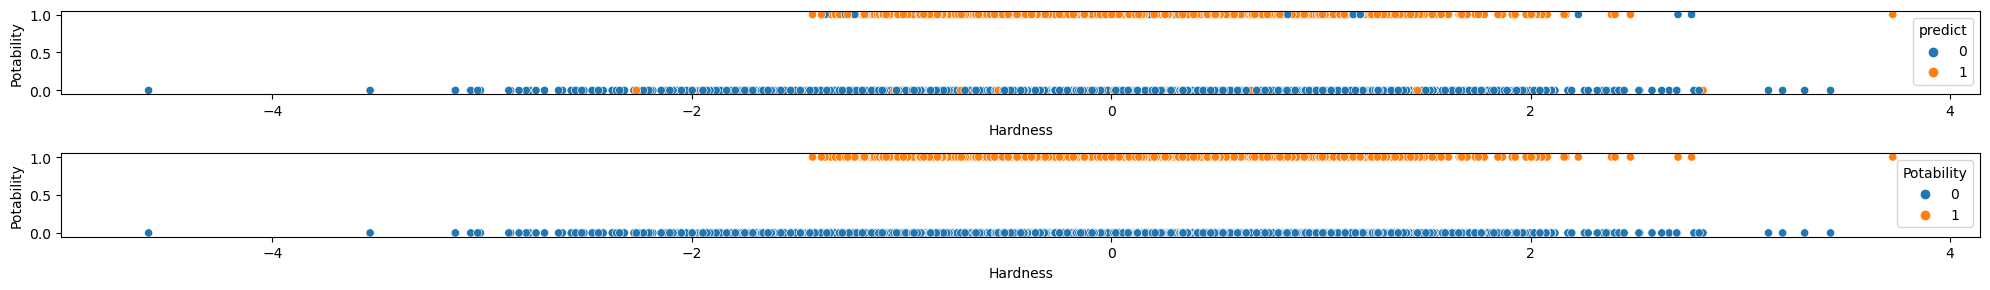

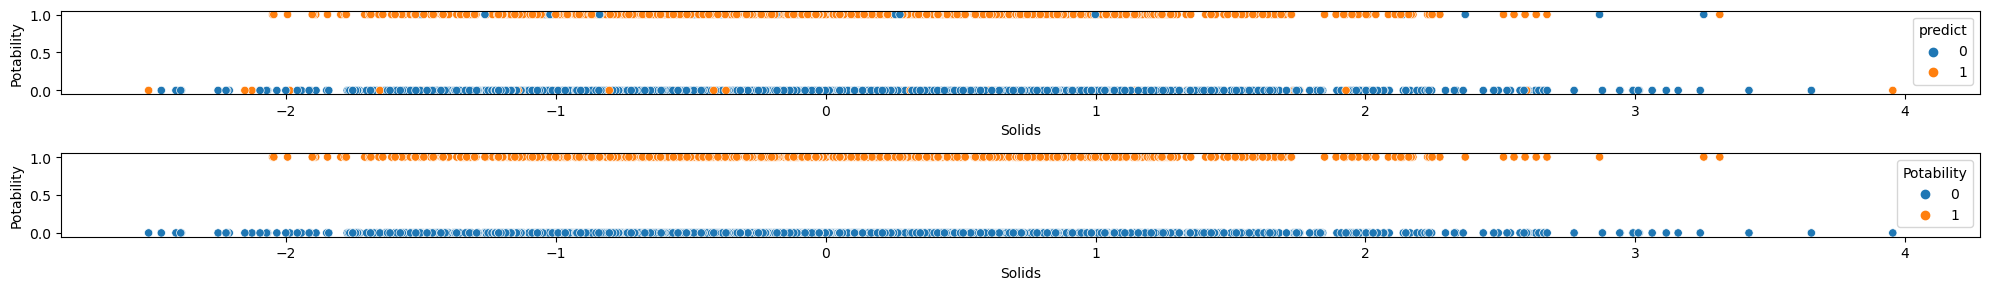

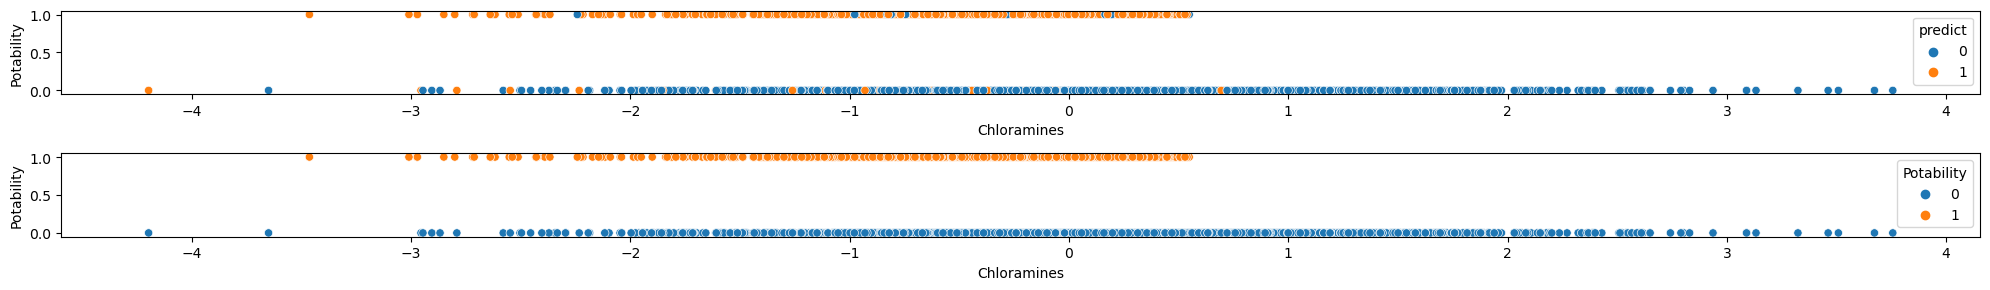

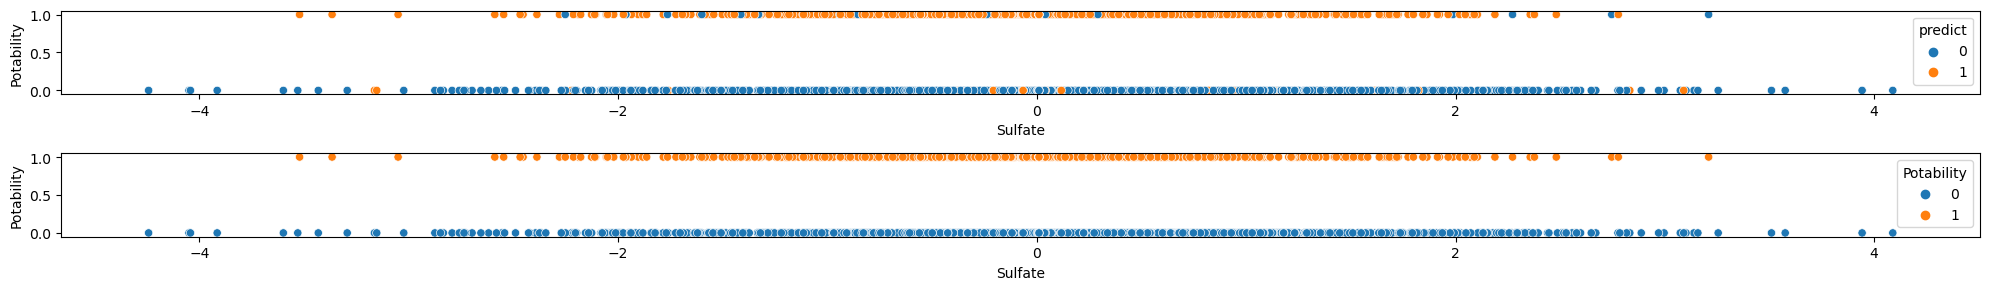

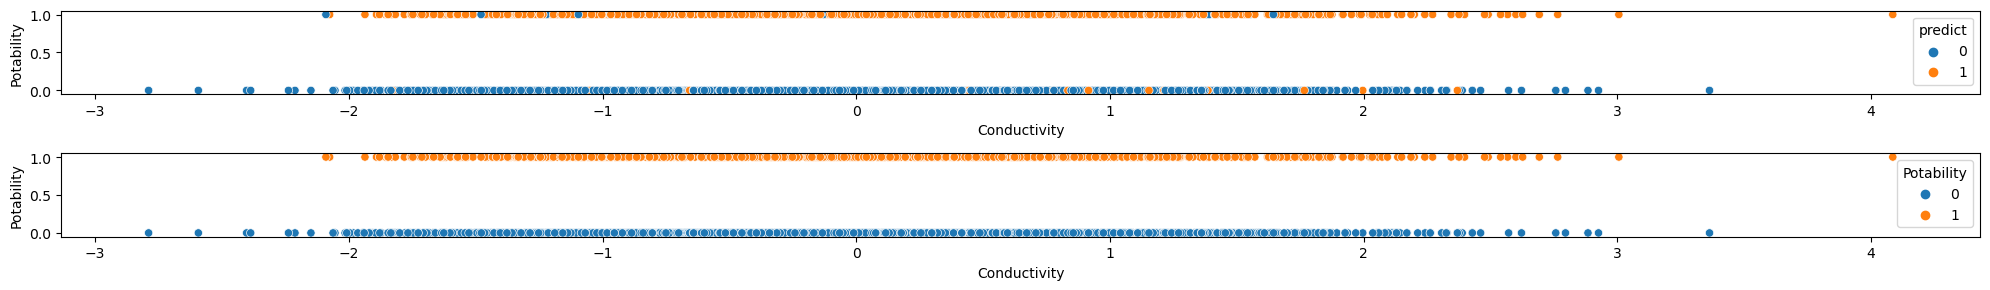

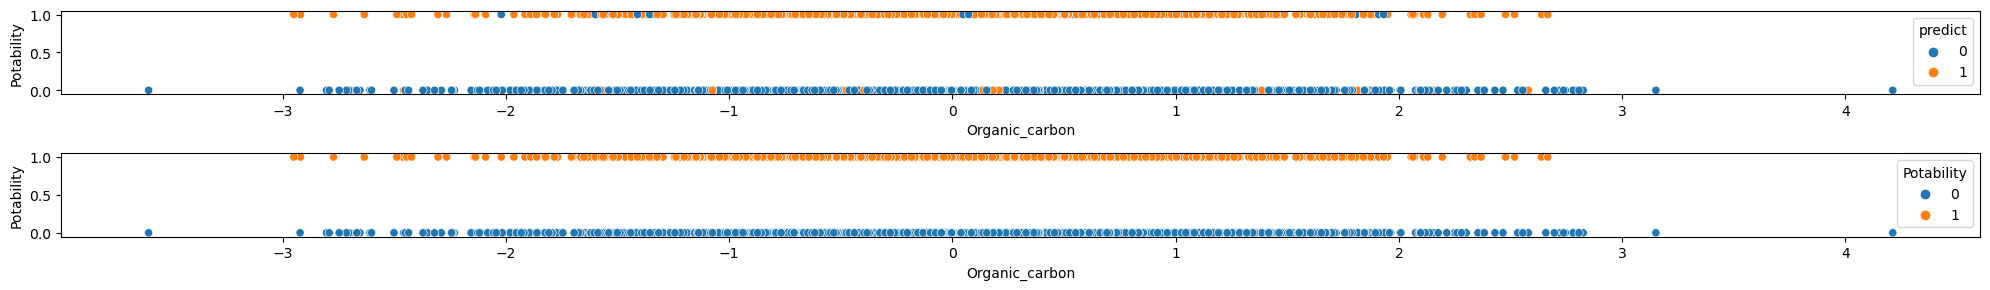

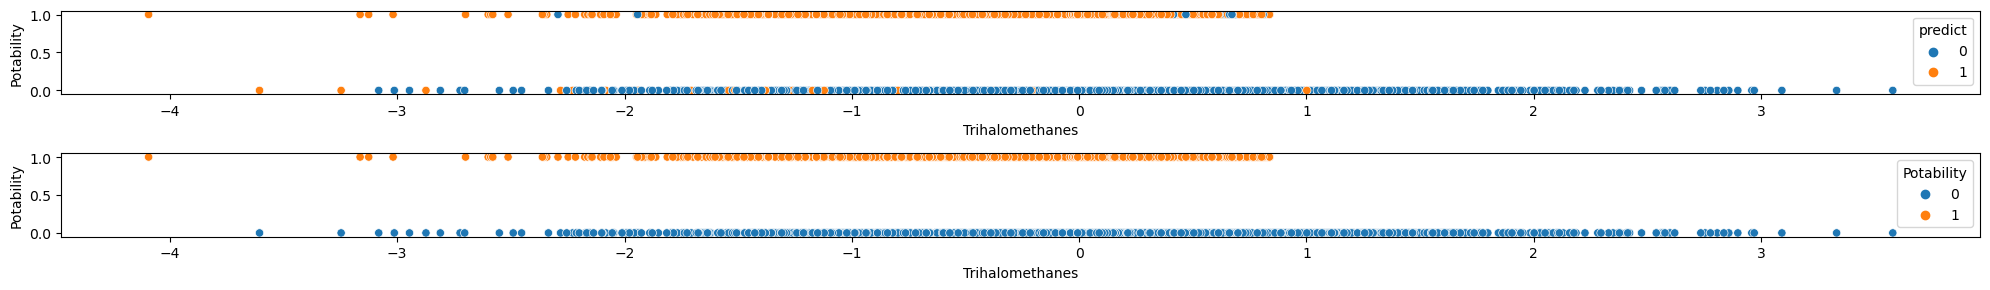

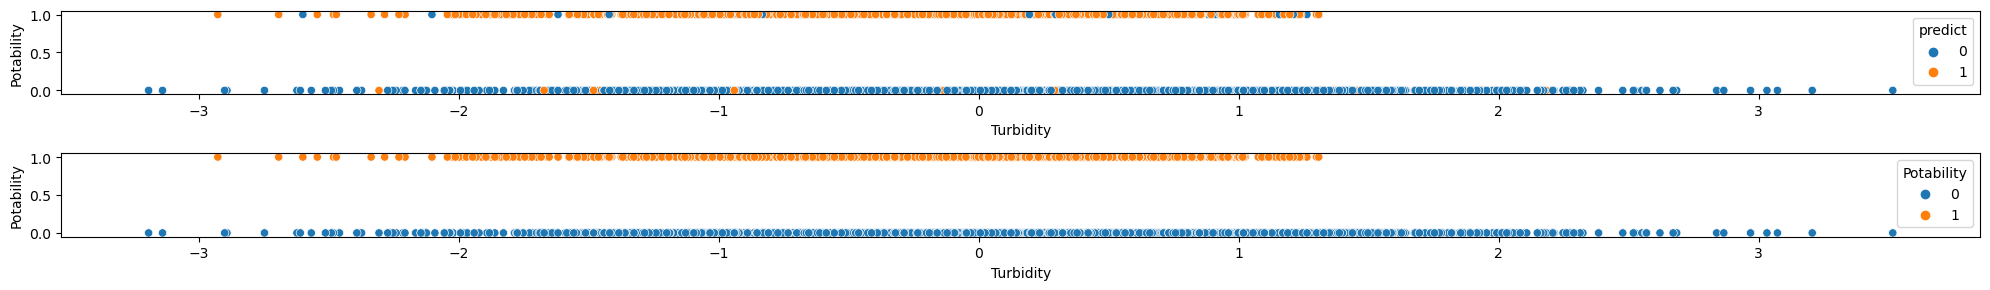

In [6]:
x = x_standardized  # Could be change (to normalized or x)

cls = KNeighborsClassifier(n_neighbors=10)  # Could be change (1, 2, ...)
cls.fit(x, y)

labels = cls.predict(x)
x["predict"] = labels
x["Potability"] = df_["Potability_det"]

for var in ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]:
    fig, axes = plt.subplots(2, 1, figsize=(20, 3))

    # Scatter plot
    sns.scatterplot(data=x, x=var, y="Potability", hue="predict", ax=axes[0])
    sns.scatterplot(data=x, x=var, y="Potability", hue="Potability", ax=axes[1])

    plt.tight_layout()
    plt.show()

Accuracy: 0.62


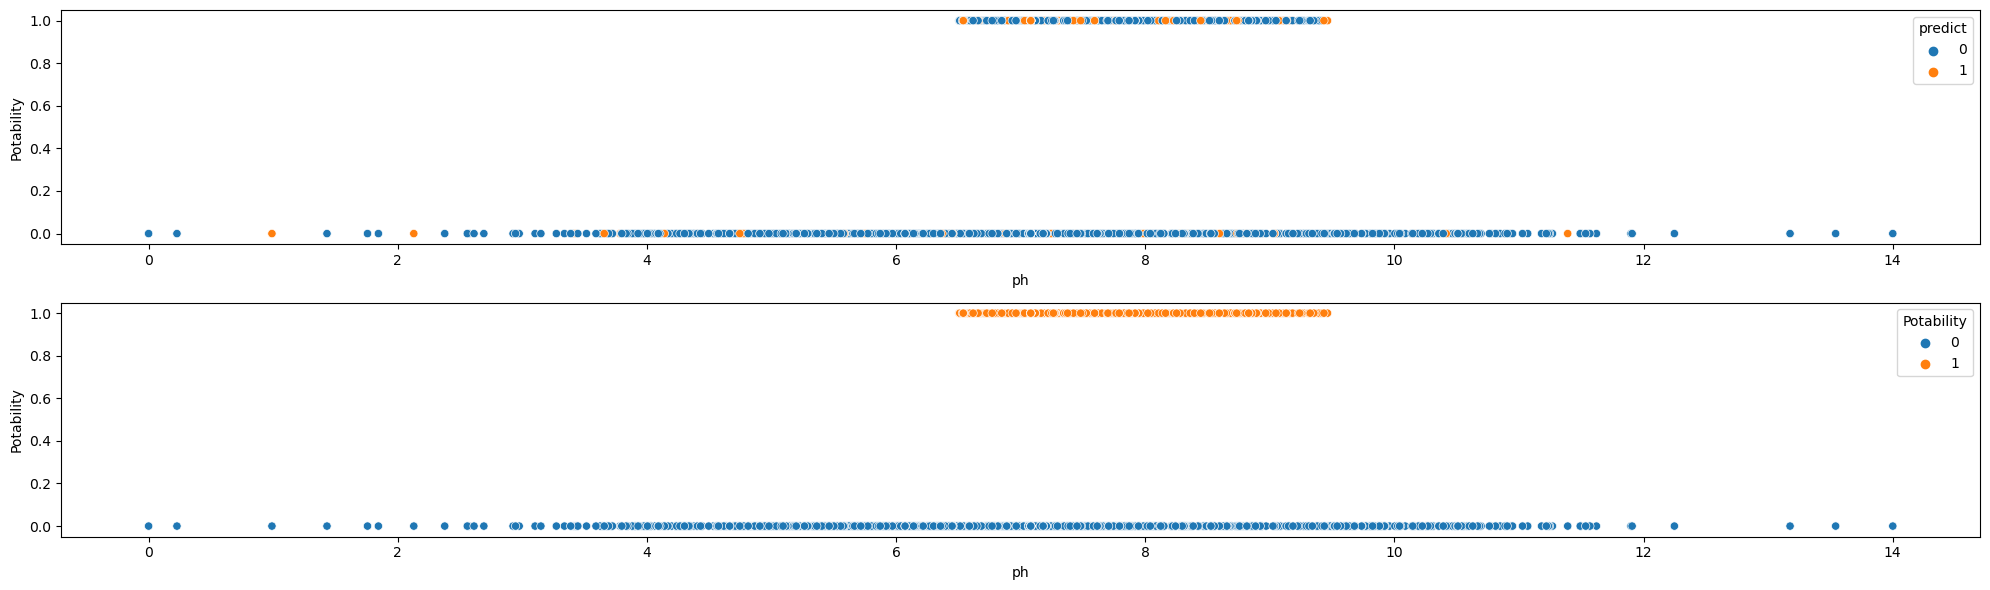

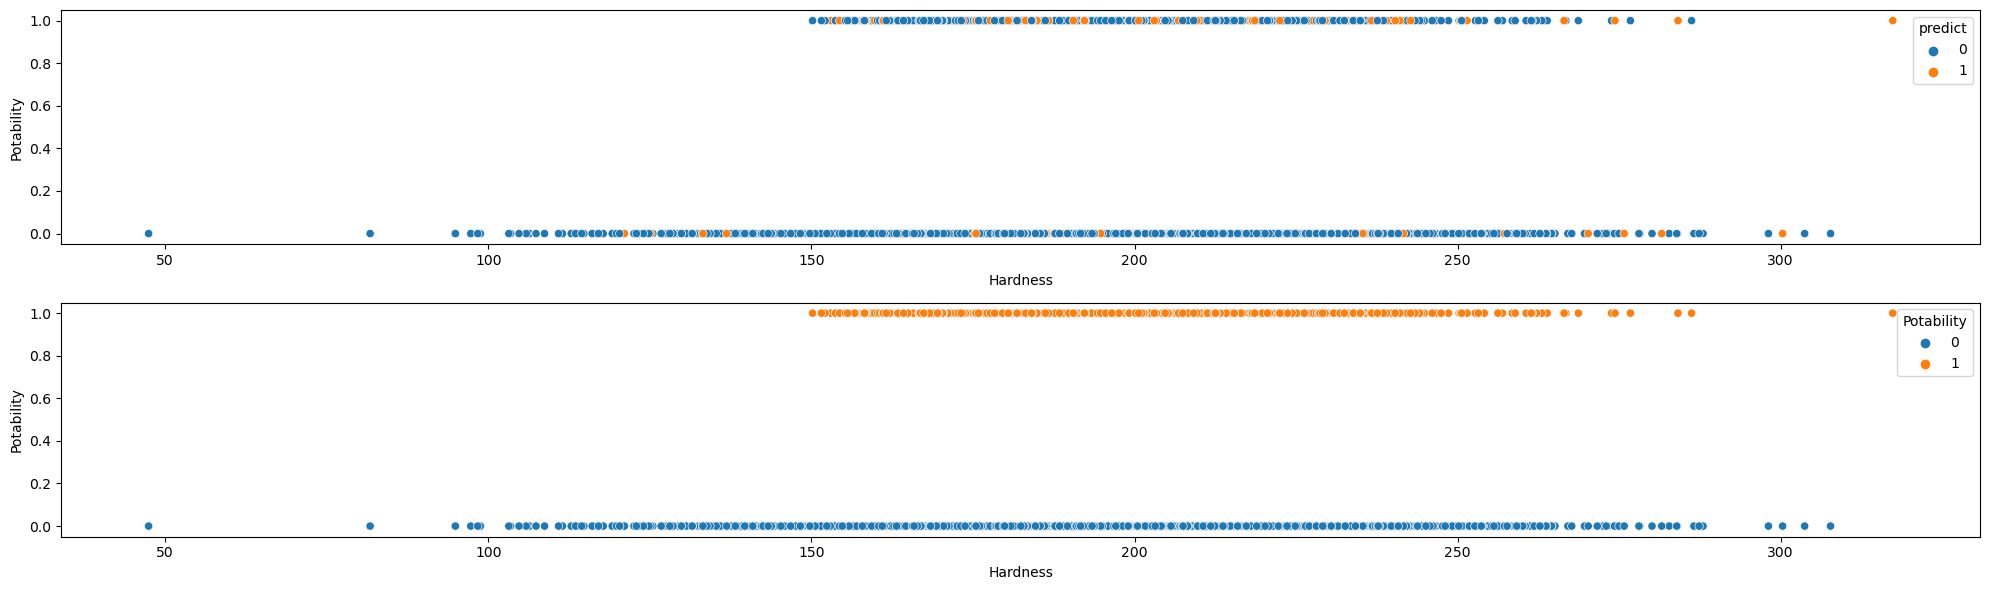

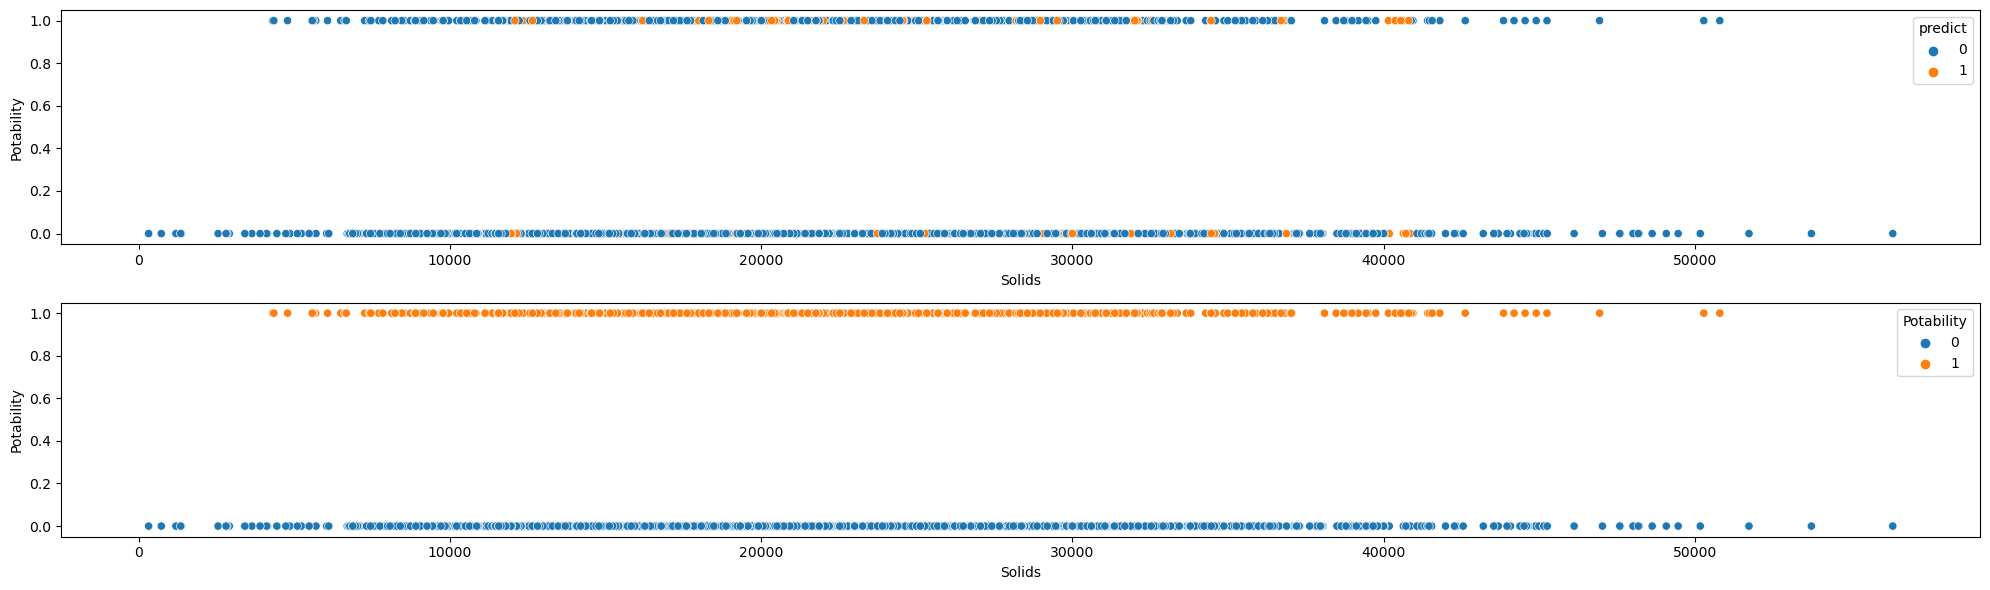

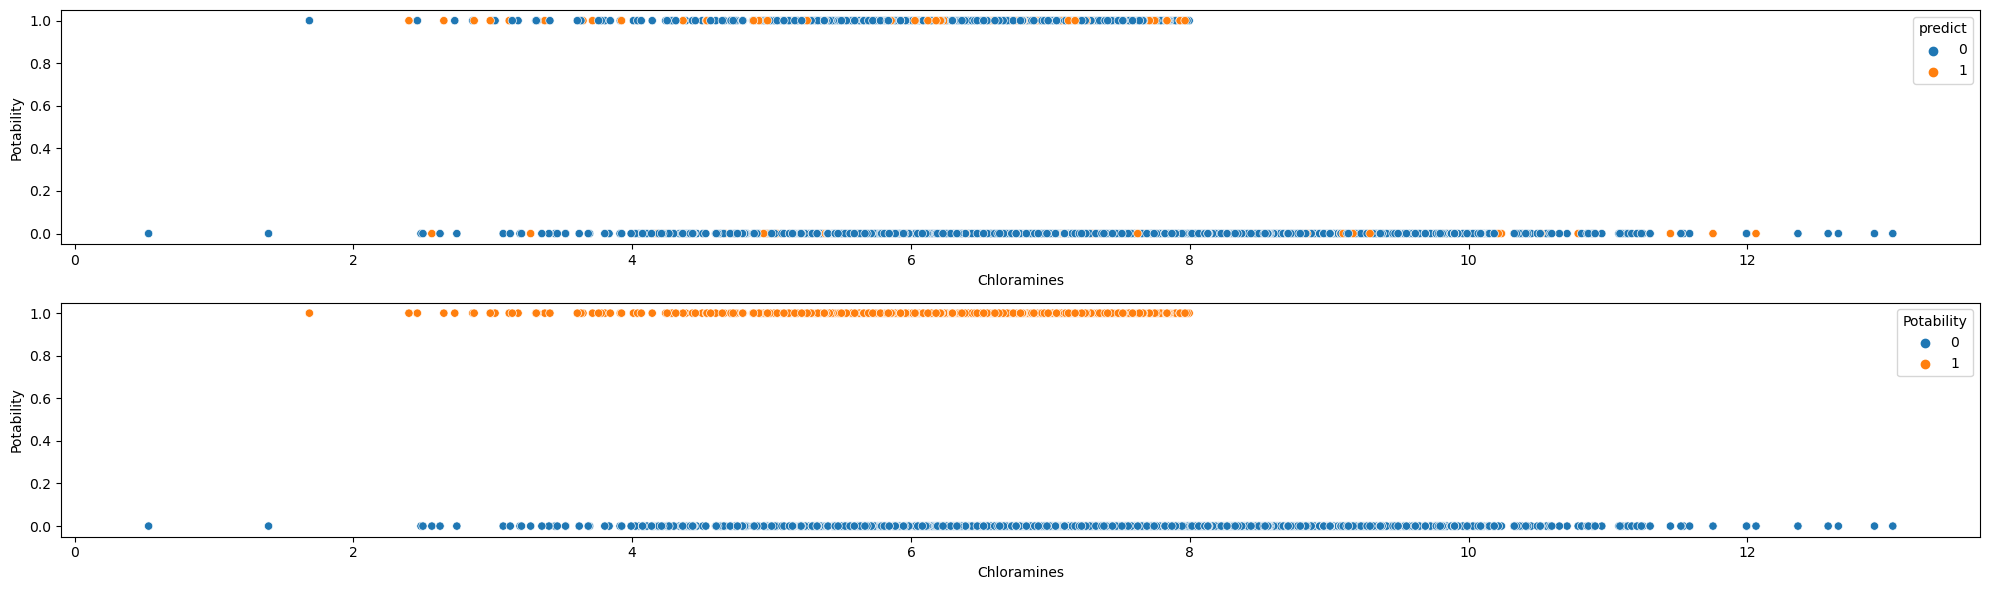

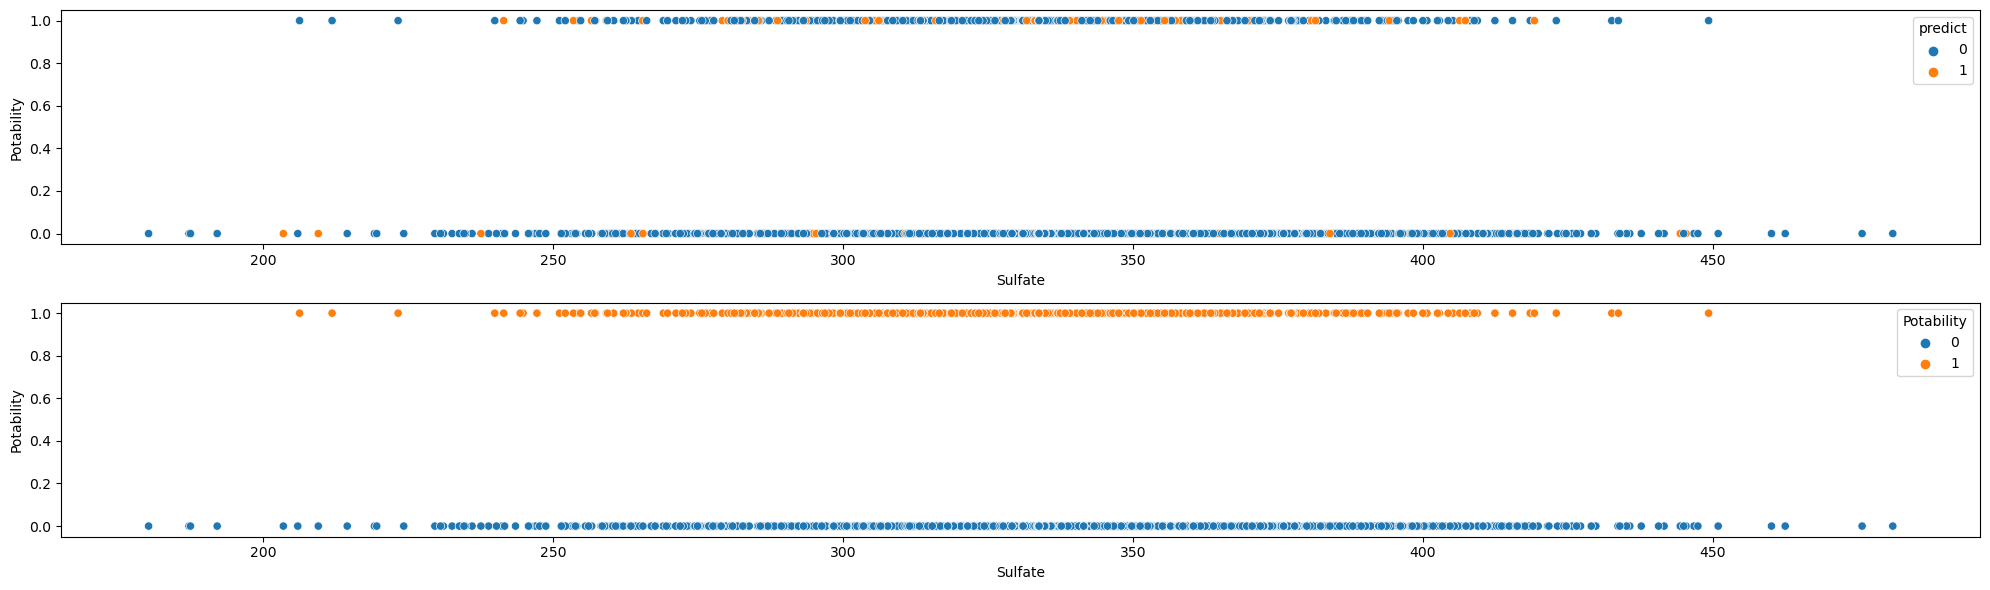

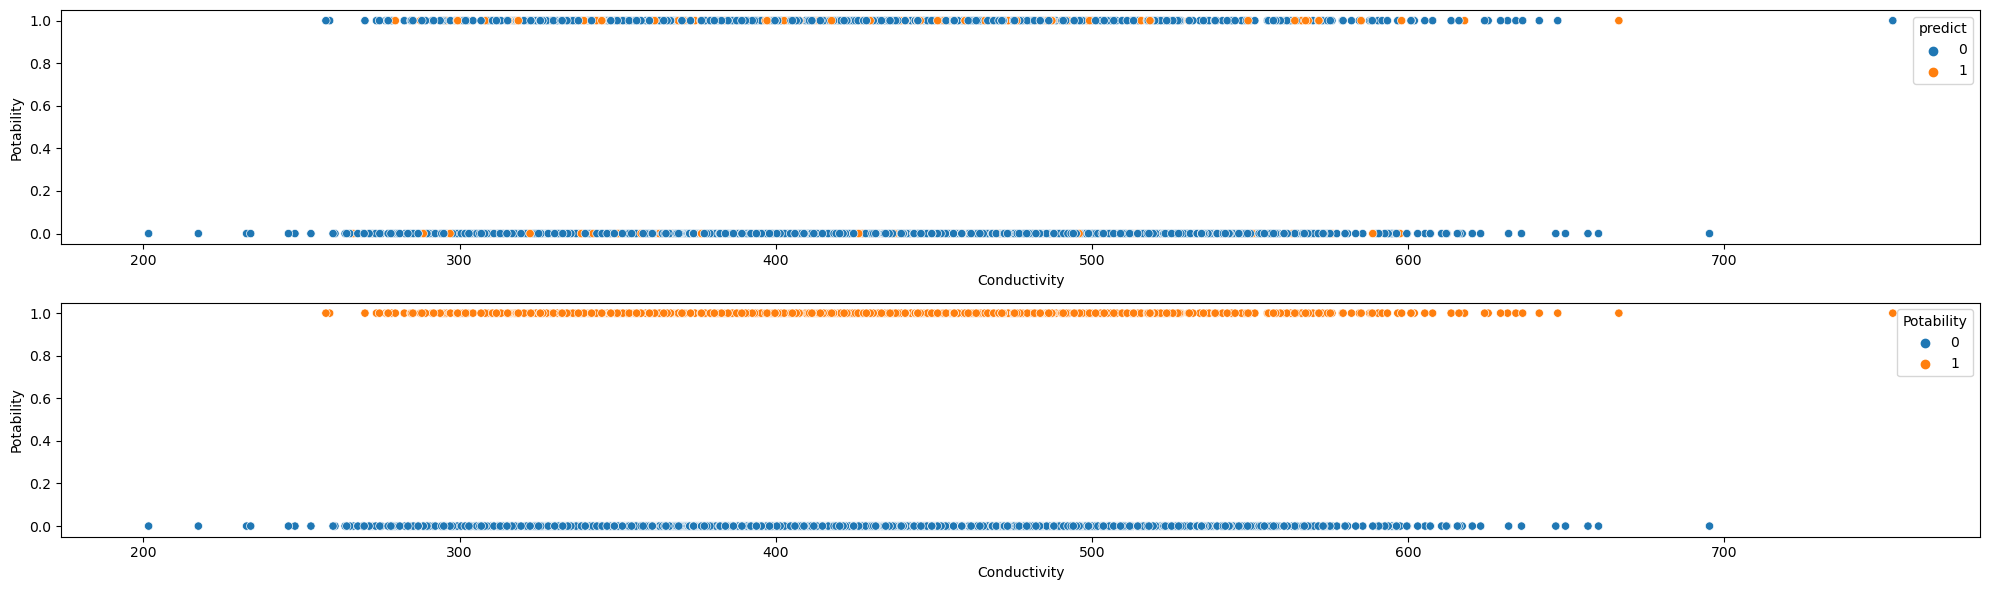

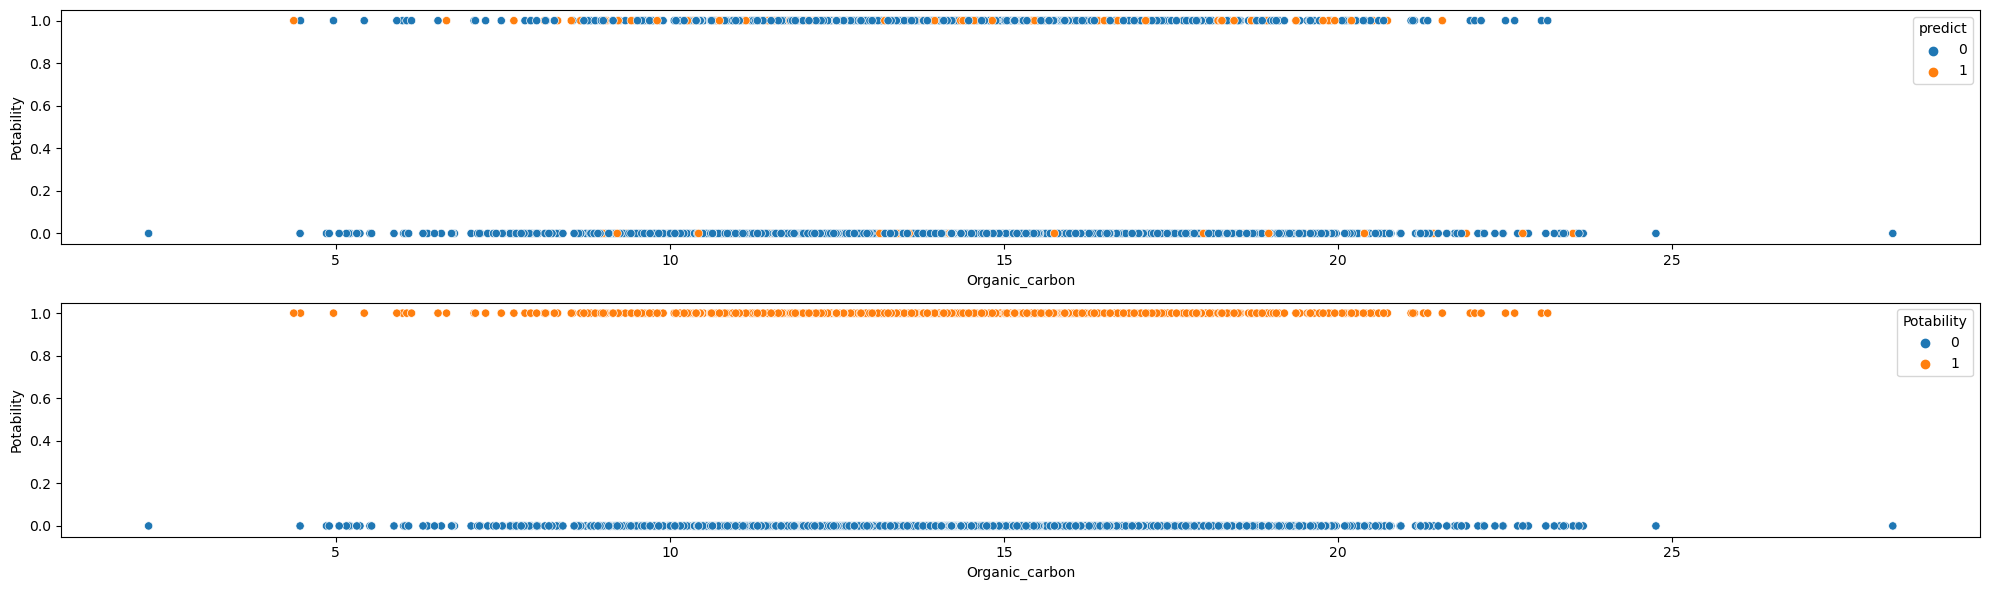

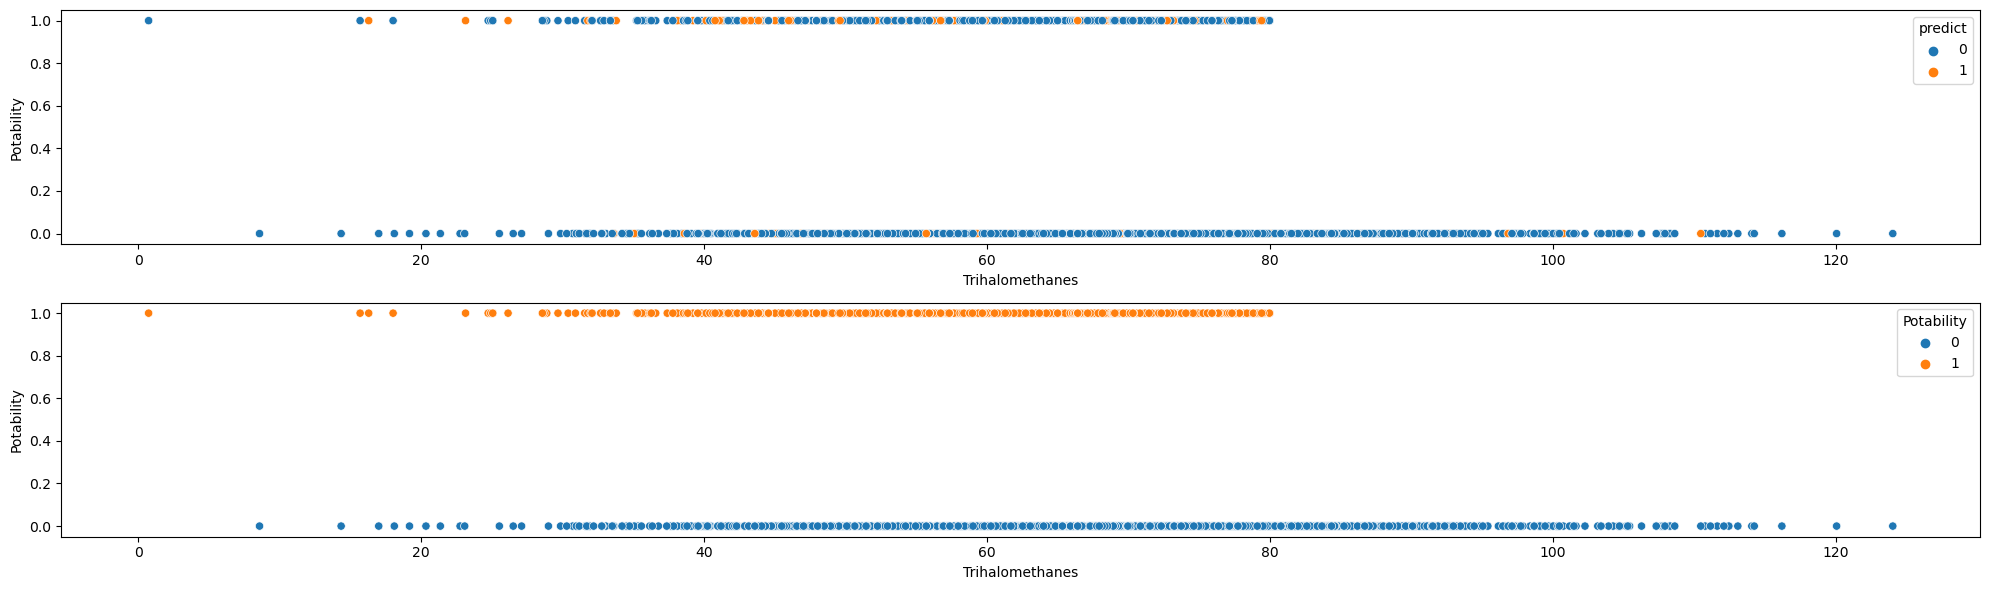

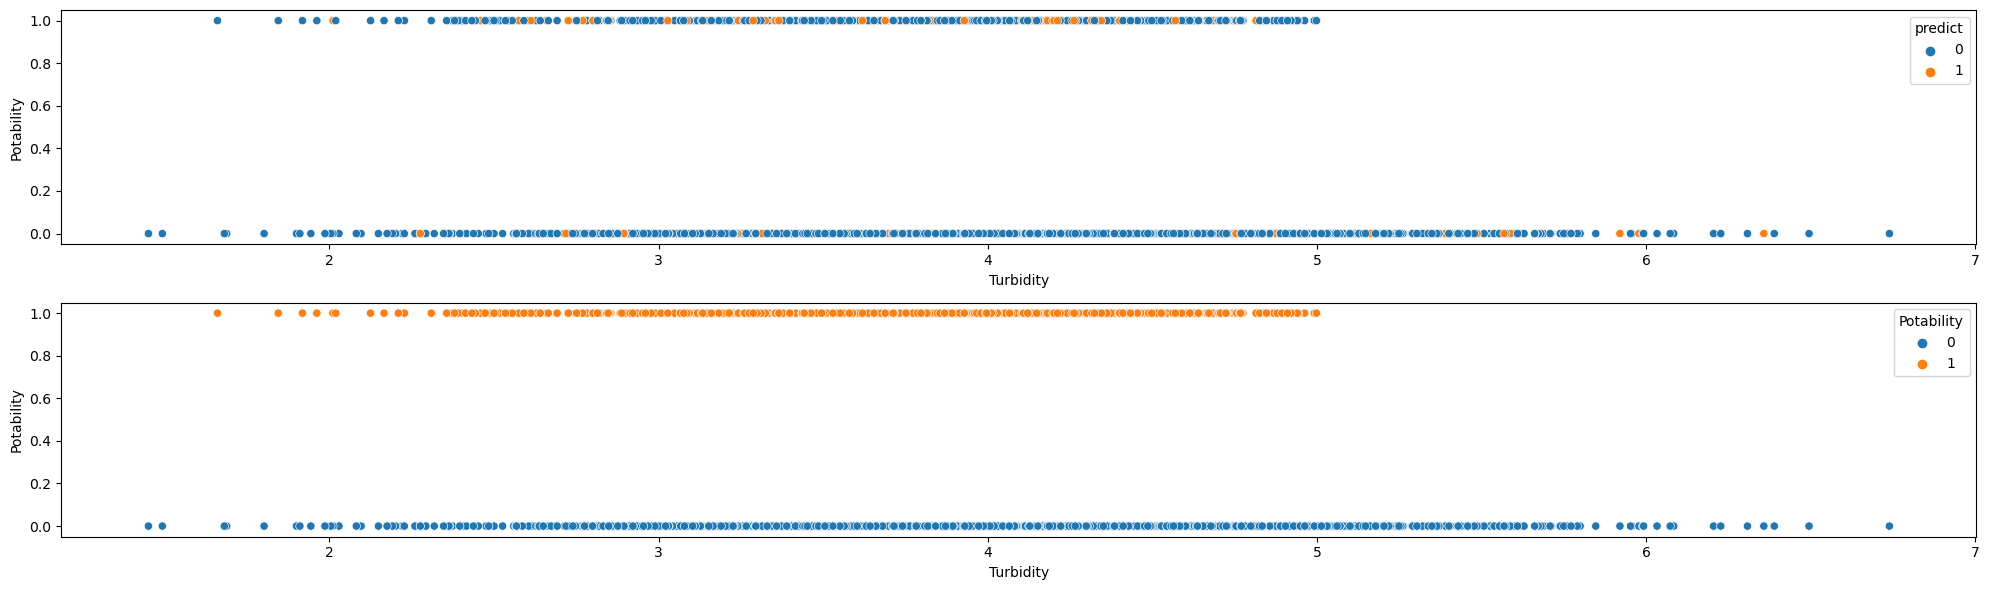

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('../../data/data_preprocessed.csv')

# Drop unnecessary columns
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = df_["Potability_det"]
x = df_.drop(["Potability_det"], axis=1)
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=10)  # Can change the number of neighbors
cls.fit(x_train, y_train)

# Predict labels on the test set
y_pred = cls.predict(x_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Add predictions to the data
x["predict"] = cls.predict(x)
x["Potability"] = df_["Potability_det"]

# Plotting
for var in ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]:
    fig, axes = plt.subplots(2, 1, figsize=(20, 6))

    # Scatter plot
    sns.scatterplot(data=x, x=var, y="Potability", hue="predict", ax=axes[0])
    sns.scatterplot(data=x, x=var, y="Potability", hue="Potability", ax=axes[1])

    plt.tight_layout()
    plt.show()

Avec validation croisée

Mean Accuracy: 0.66


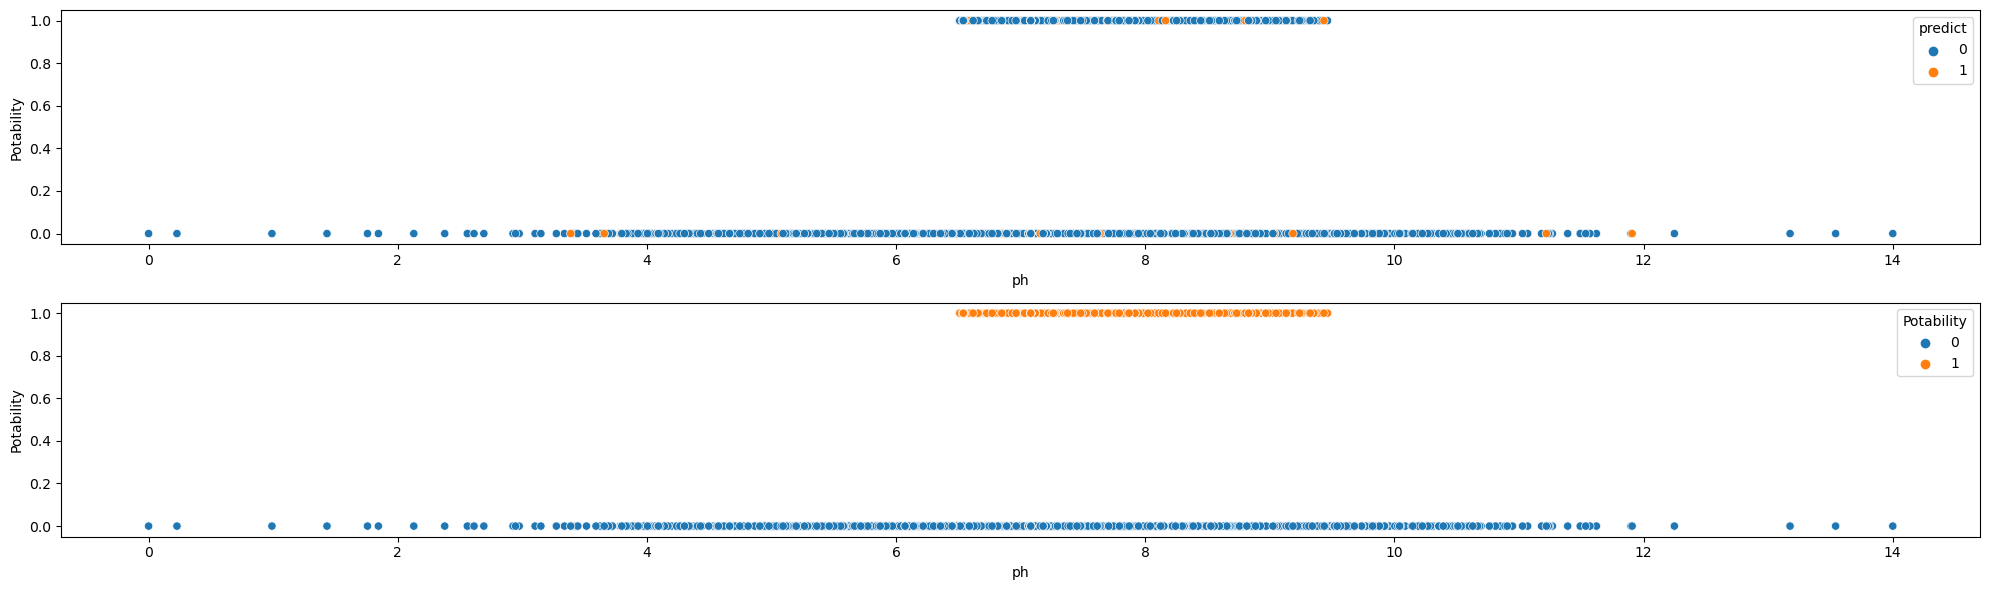

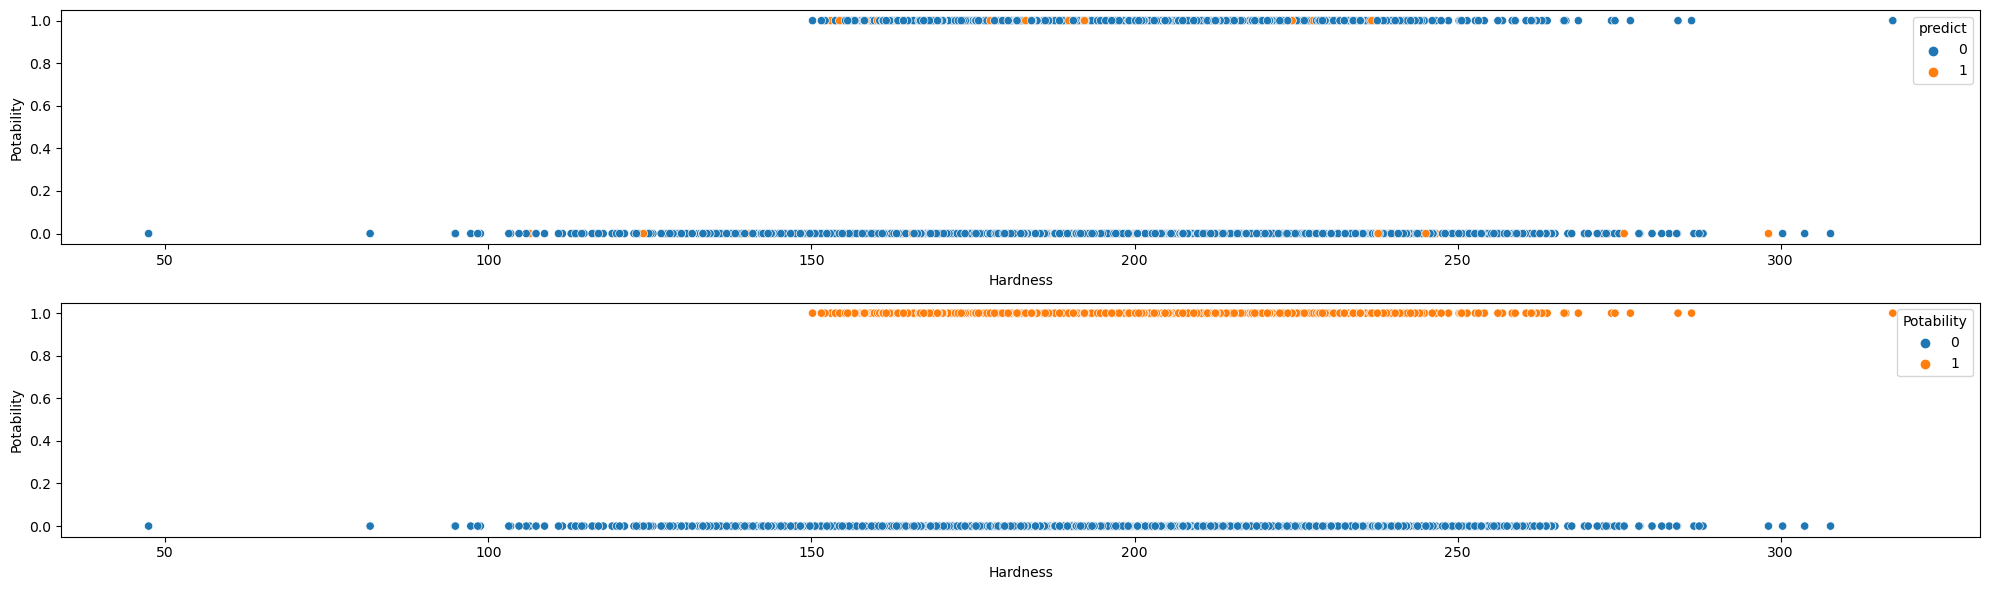

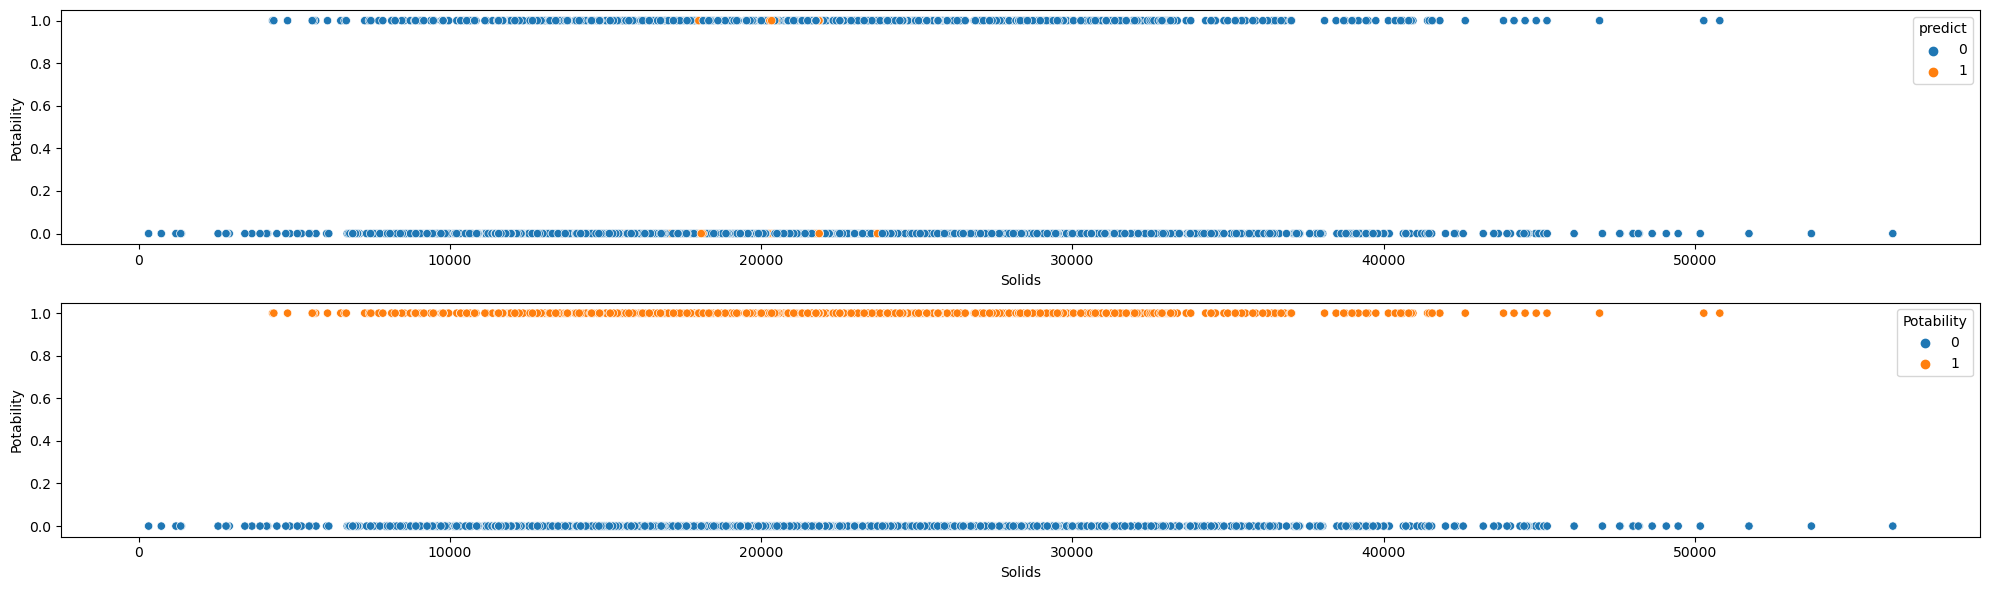

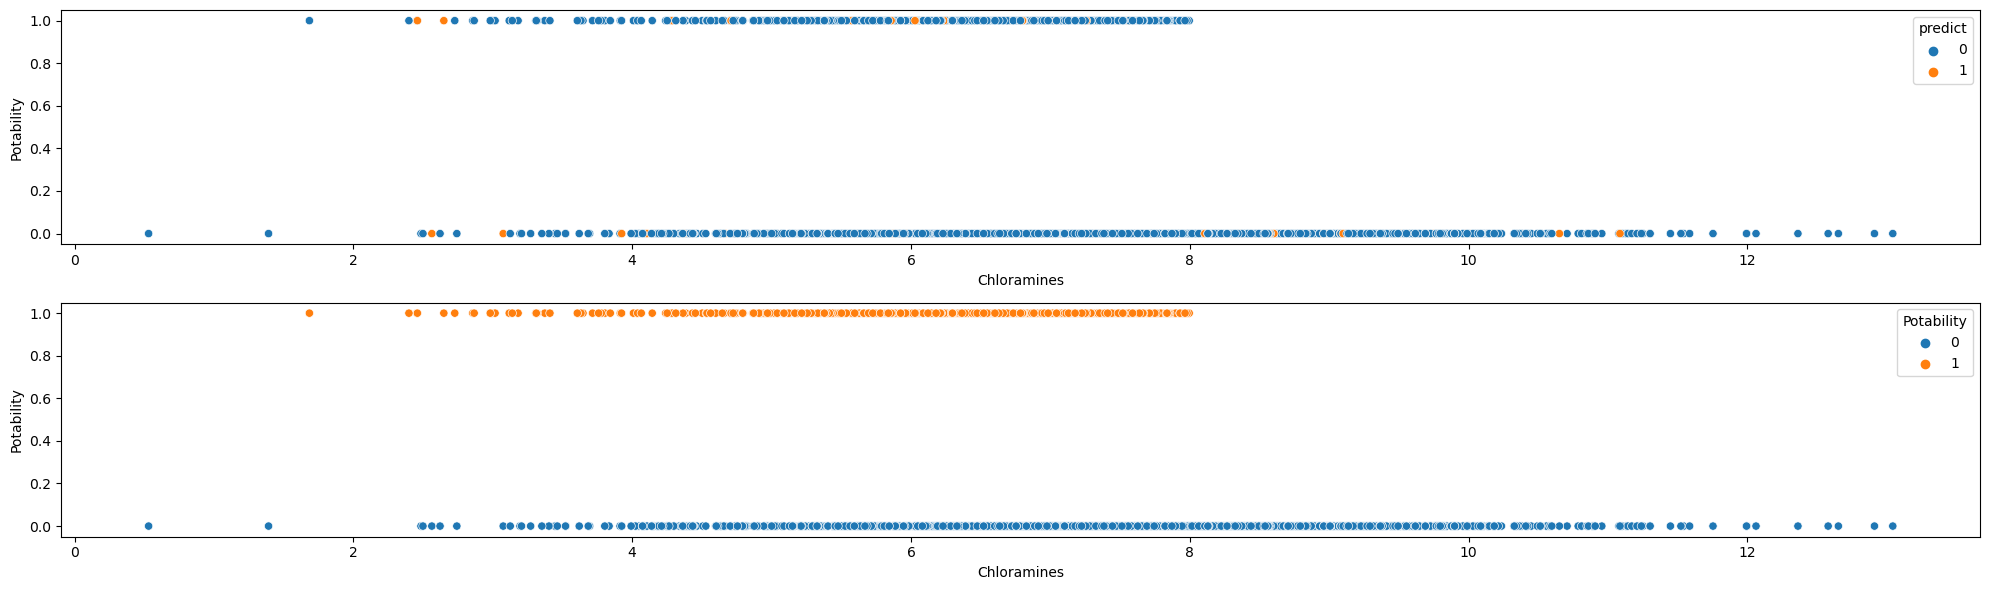

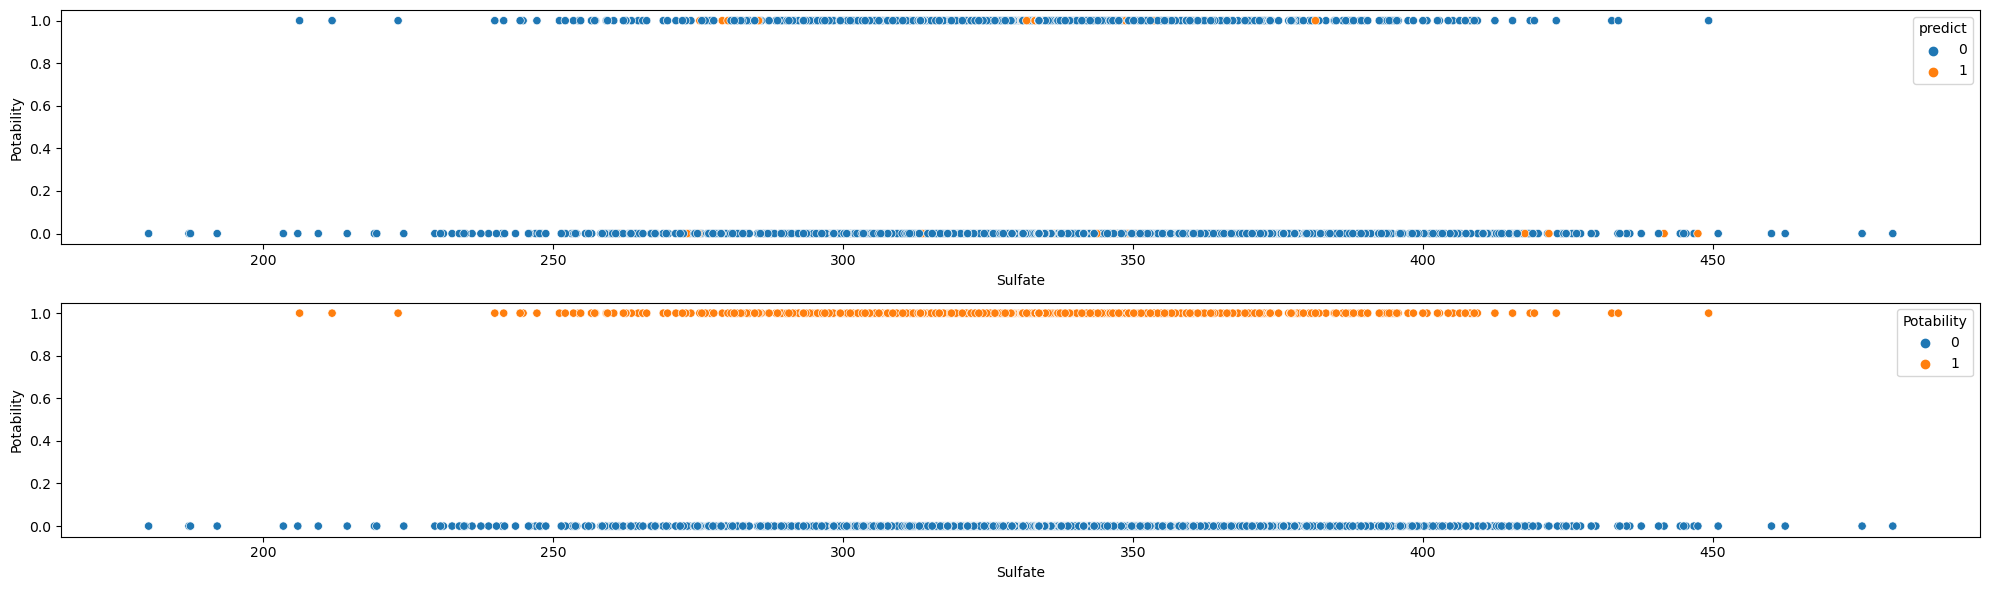

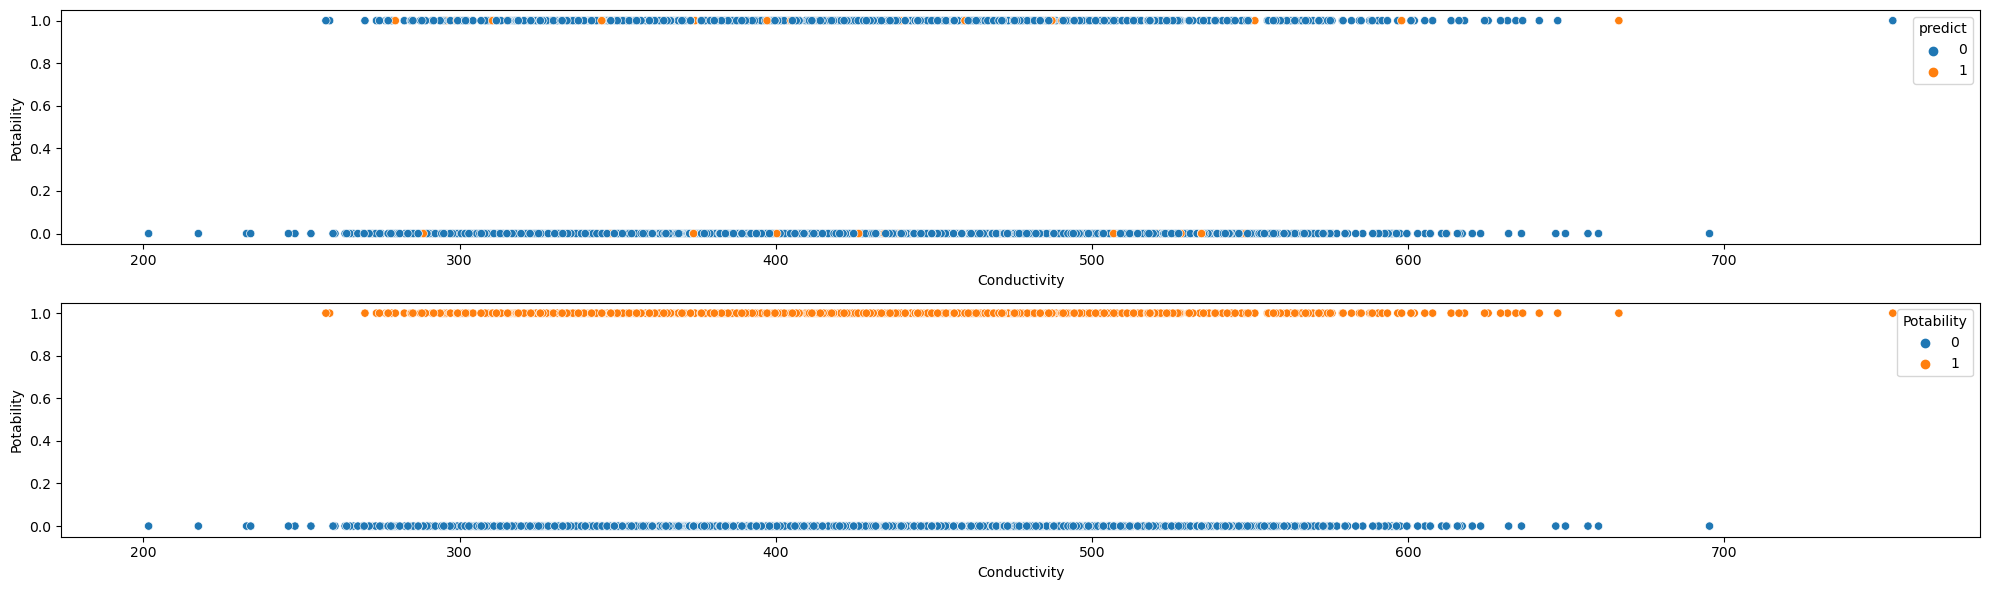

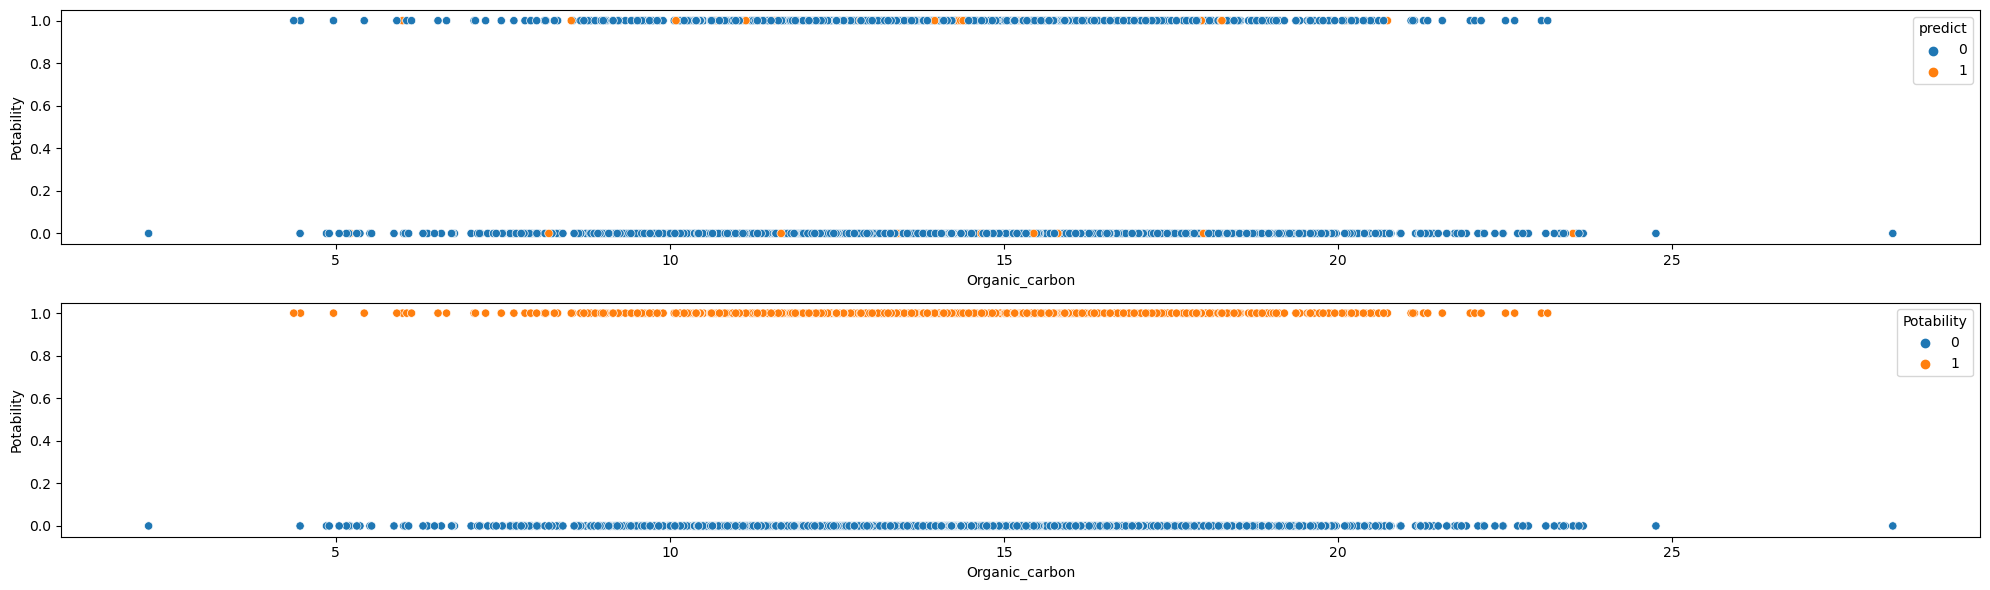

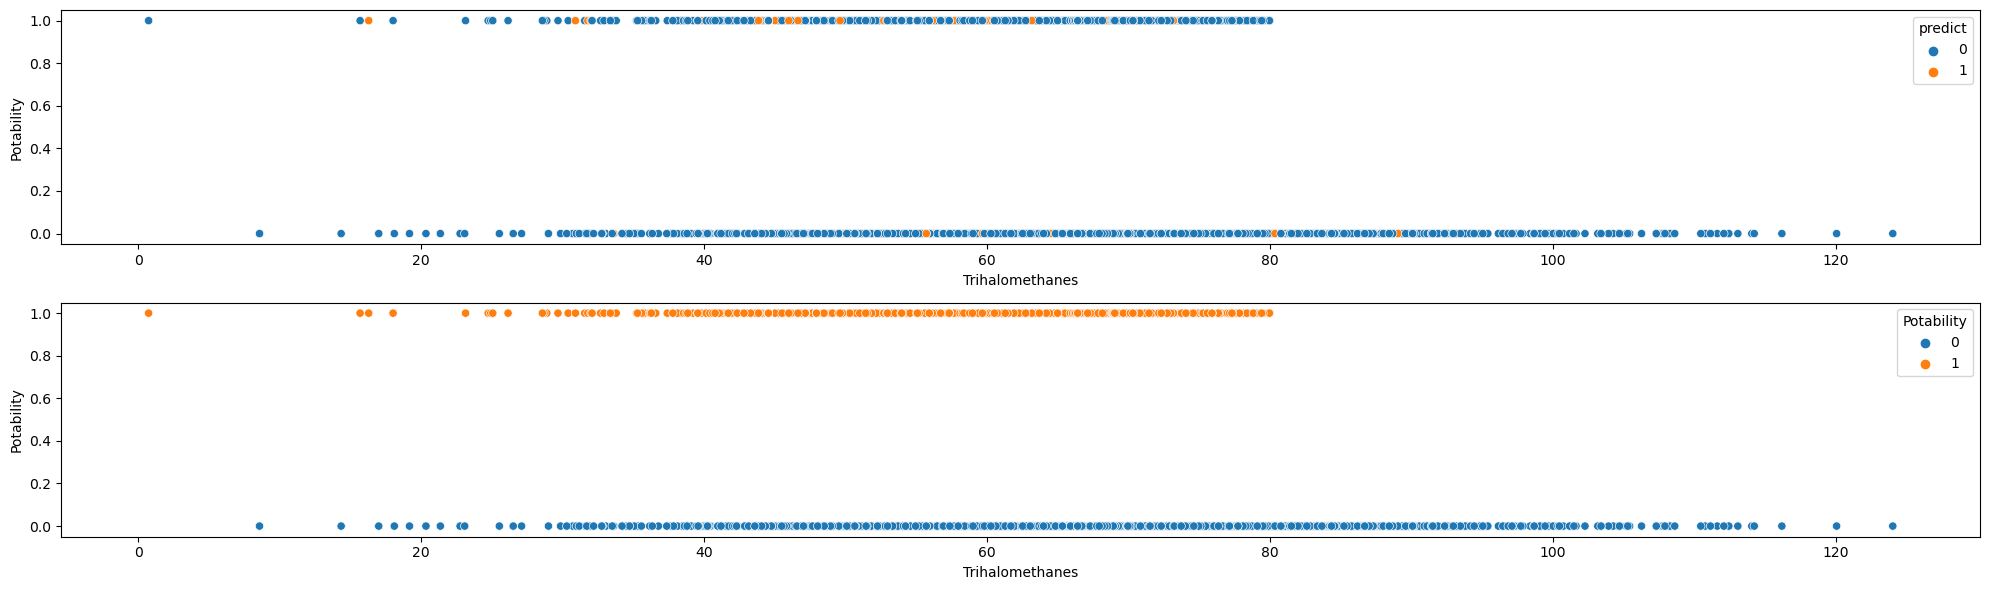

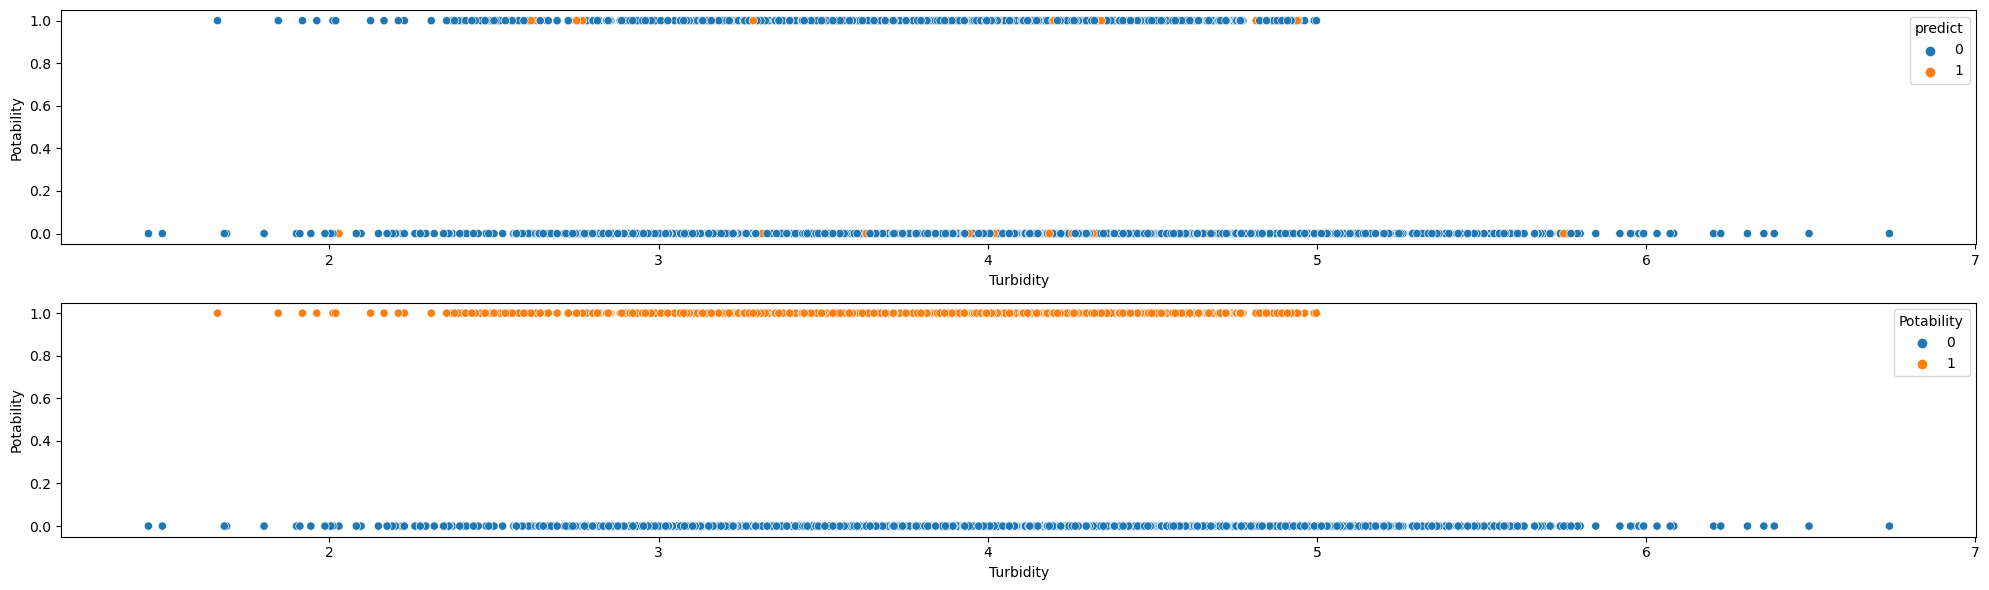

In [22]:
# Perform cross-validation
cls = KNeighborsClassifier(n_neighbors=30)  # Can change the number of neighbors
cls.fit(x_train, y_train)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(cls, x, y, cv=5)  # 5-fold cross-validation

# Calculate and display the mean accuracy
mean_accuracy = cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Add predictions to the data for plotting purposes
cls.fit(x, y)
x["predict"] = cls.predict(x)
x["Potability"] = df_["Potability_det"]

# Plotting
for var in ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]:
    fig, axes = plt.subplots(2, 1, figsize=(20, 6))

    # Scatter plot
    sns.scatterplot(data=x, x=var, y="Potability", hue="predict", ax=axes[0])
    sns.scatterplot(data=x, x=var, y="Potability", hue="Potability", ax=axes[1])

    plt.tight_layout()
    plt.show()

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Drop unnecessary columns
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = df_["Potability_det"]
x = df_.drop(["Potability_det"], axis=1)

# Centering the features by subtracting the mean
mean = x.mean(axis=0)
x_centered = x - mean

# Initialize the scalers
scaler_s = StandardScaler()
scaler_m = MinMaxScaler()

# Apply MinMaxScaler
x_normalized = pd.DataFrame(scaler_m.fit_transform(x_centered), columns=x.columns)

# Apply StandardScaler
x_standardized = pd.DataFrame(scaler_s.fit_transform(x_centered), columns=x.columns)

# Use standardized data for further processing (can change to normalized or x_centered)
x = x_standardized

# List to hold accuracies for each feature
accuracies = {}

# Initialize the KNeighborsClassifier
n_neighbors = 30

# Iterate through each feature and calculate the cross-validated accuracy
for feature in x.columns:
    # Select the feature for training and testing
    x_feature = x[[feature]]
    
    # Perform cross-validation
    cls = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_scores = cross_val_score(cls, x_feature, y, cv=5)  # 5-fold cross-validation
    
    # Calculate and store the mean accuracy
    mean_accuracy = cv_scores.mean()
    accuracies[feature] = mean_accuracy
    print(f"Mean Accuracy for {feature}: {mean_accuracy:.2f}")

# Convert the accuracies dictionary to a DataFrame for better display
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=["Feature", "Mean Accuracy"])
print(accuracies_df)


Mean Accuracy for ph: 0.68
Mean Accuracy for Hardness: 0.64
Mean Accuracy for Solids: 0.66
Mean Accuracy for Chloramines: 0.64
Mean Accuracy for Sulfate: 0.65
Mean Accuracy for Conductivity: 0.65
Mean Accuracy for Organic_carbon: 0.65
Mean Accuracy for Trihalomethanes: 0.65
Mean Accuracy for Turbidity: 0.65
           Feature  Mean Accuracy
0               ph       0.679467
1         Hardness       0.640219
2           Solids       0.658094
3      Chloramines       0.639771
4          Sulfate       0.651987
5     Conductivity       0.654163
6   Organic_carbon       0.654602
7  Trihalomethanes       0.645006
8        Turbidity       0.649377
